<a href="https://colab.research.google.com/github/Shabana0811/Bike_Sharing_Demand/blob/main/ML_Bike_Sharing_Demand_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project Name** - Bike Sharing Demand   



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Shabana Ali


# **Project Summary -**

This TED Talks Views prediction dataset contains 19 features and 4005 observations of 15
year, i.e., from 1-12-2017 to 31-11-2018. We have a regression problem because our target is
the number of rented bikes per hour. This Regression analysis helps to achieve the goal of the
company Seoul Bike in providing the city with a stable supply of rental bikes. It becomes a
major concern to keep users satisfied. The crucial part is the prediction of bike count required at
each hour for the stable supply of rental bikes.
After loading the dataset, firstly, we performed data preprocessing, we did some data
exploration by checking types, missing values, duplicate values and data description. In this
dataset there are neither null values nor duplicate values. We also changed the date type to
Date Time which was initially a str object. From the date, we also created three columns with
the day of the week and the month and the year corresponding. We also changed the datatype
of the hour feature from int to object.
After that, we performed Exploratory Data Analysis to obtain the insights of our dependent
variable Rented Bike Counts. Various graphs were constructed comparing the Rented Bike
Count column with other columns. List of insights were obtained. We observed that bike rental
count is higher during weekdays than weekend days. The rental bike counts are at its peak at 8
AM in the morning and 6pm in the evening. Highest rental bike count is during Autumn and
summer seasons and the lowest in winter season.
Next step was feature engineering, in which we detected and took care of multicollinearity.
We used the square root method to normalize the target variable. For scaling independent
features, we used Yeo Johnson transformation technique. Lastly, we used Pandas dummies
for encoding the categorical features.
Now the modeling part begins, here we used 8 regression algorithms, viz., Linear Regression,
Ridge, Lasso, Polynomial, Decision Tree, Random Forest Regressor, Gradient Boosting
Regressor and Extra Trees Regressor. So, after fitting the models and evaluating metrics (MSE,
RMSE, R Square, Adjusted R Square) and also hyperparameter tuning we came to the
result and conclusion. We got the Adjusted R2 among all the models, Extra Trees Regressor
gives the highest Score where Adjusted R2 score is 0.908699 and Training score is 0.987167.
Therefore, this model is the best for predicting the bike rental count on an hourly basis.




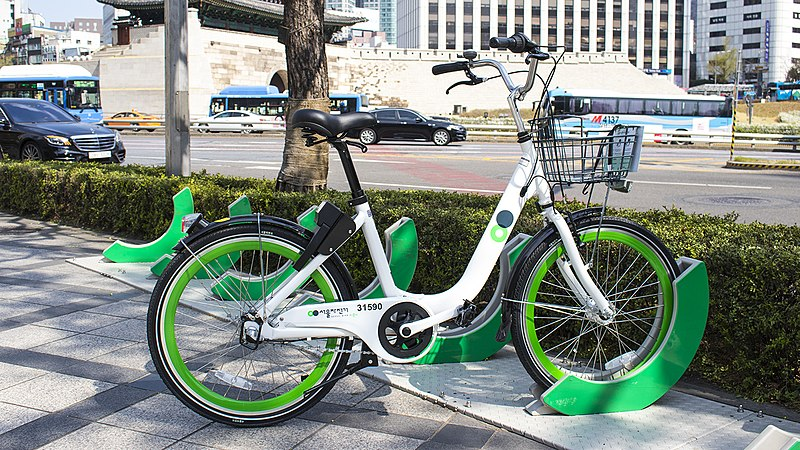

# **GitHub Link -**

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually,providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.    

# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
#Mount the google drive in google colab.
from google.colab import drive
drive.mount('/content/drive')

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,6)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/Bike/SeoulBikeData.csv'
df = pd.read_csv(path,encoding = 'latin' ,parse_dates=['Date'])

### Dataset First View

In [ ]:
# Dataset First five rows
df.head()

In [ ]:
# Dataset Last five rows
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?




*   This data set consist of 8760 rows and 14 columns.
*   If we observe the data column,in the dataset,it begins from 1-12-2017 to 30-11-2018.That means we have exact 1 year of seoul bike sharing demand data.

*   Value count of missing value is also 0.
*   From 14 features our target feature is Rented Bike Count and rest are independent features.












## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

### Variables Description

In [ ]:
# Dataset Describe
df.describe().T

Above you can see the count of dataset is 8760. In this maximum value is 3356 of Rented Bike count.Mean of wind speed is 1.724909.Std of snowfall is 0.436746.


### Check Unique Values for each variable.

In [ ]:
uniqueValues = df['Rented Bike Count'].nunique()
print(uniqueValues)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

Now we will create the seperate date,month,year by extracting from the date column and then drop the date column.

In [ ]:
#extract day from date
df['WeekDay']=df["Date"].dt.day_name()
#extract month from date
df['Month']=pd. DatetimeIndex(df['Date']).month_name()
#extract year from date
df['year']=df['Date'].dt.strftime('%Y')

In [ ]:
df.info()

In [ ]:
#Dropping the date column as we extracted all formats of date and keep them in seperate columns respectively.
df.drop(columns=['Date'],inplace=True)

In [ ]:
#checking outliers
C = ['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
n = 1
plt.figure(figsize=(18,12))

for i in C:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()


In [ ]:
#converting Hour column integer to Categorical
df['Hour']=df['Hour'].astype('object')

### What all manipulations have you done and insights you found?

We can see the outlier in rainfall and snowfall columns but we don't have to worry about outliers in this data, because if we treat the outliers from Rainfall and snowfall columns, it removes all the information of the data.
Now we will create the seperate date,month,year by extracting from the date column and then will drop the date column.Hour column datatype is of integer.But the date column is of timestamp and 'hour' the part of timestamp.So it should be the categorical column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
#Setting the default fig size
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,6)

In [ ]:
# Chart - 1 Box PLot
C_columns=['Seasons','Hour','Holiday','WeekDay','year','Month']
n=1
plt.figure(figsize=(20,12))
for i in C_columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(x=df[i],y=df['Rented Bike Count'])
  plt.title(f"Count over {i}")
  plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

It gives clear picture and helps to analyse .

##### 2. What is/are the insight(s) found from the chart?



*   In count over Seasons, the demand for bike in Winter is less than compare to summer and other seasons.

*   In count over Hour, if we observe during the day,the demand for bikes is high from morning 8am and from evening 6pm.
*   Demand for the rented bike during No Holiday is higher than the holiday.

*   Now in Count over Month graph, if we observe carefully,the demand for the bike is lesser in the months which are December,January,Februraryas at that time it is the winter season.
*   In the months such as April,May,June the demand for the bike is higher because these months  fall in Summer Seasons.








#### Chart - 2

In [ ]:
# Chart - 2 Distribution of target column
plt.figure(figsize=(8,6))
sns.histplot(df['Rented Bike Count'],bins=50,color='orange',)
plt.axvline(df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(df['Rented Bike Count'].median(), color='indigo', linestyle='dotted', linewidth=3)
plt.show()
sns.distplot(df['Rented Bike Count'])
plt.show()

#### Chart - 3

In [ ]:
# Chart - 3 normalizing the distribution of target column using sqaure root
sns.displot(np.sqrt(df['Rented Bike Count']),color='r')
plt.show()

##### 1. Why did you pick the specific chart?

Its Provides insights which is visibly clear.


##### 2. What is/are the insight(s) found from the chart?



1.   The shape of the Rented Bike Count feature is RIGHTLY SKEWED.

1.  We have transform this distribution info approx normal distribution using appropriate transformation tecniques.
2.   We used square root transformation,as it transforming this skewed distribution into normal.






#### Chart - 4

In [ ]:
# Chart - 4 seeing the data distribution of the numerical features
N = df[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
n=1
for i in N:
  plt.subplot(9,3,n)
  plt.figure(figsize=(10,8))
  n+=1
  sns.distplot(df[i],color = 'indigo')
  plt.show()

  What is/are the insight(s) found from the chart?

As we can see,bike count is more in the year 2018 than 2017.

#### Chart - 5

In [ ]:
# Chart - 5 total number of rented bike count per season
dfSeasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
dfSeasons

In [ ]:
dfSeasons.plot(kind='bar',color=['red','blue','pink','black'],y='Rented Bike Count')
plt.show

#####  What is/are the insight(s) found from the chart?





Bike count in the summer season is more.While in winter the count is less.

#### Chart - 6

In [ ]:
# Chart - 6 Rented Bike Count during Days of the Week
fig,ax=plt.subplots(figsize=(21,9))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='WeekDay',data = df,ax=ax)
ax.set(title='Rented Bike Count per hour during Days of the Week')
plt.show()

##### 1. Why did you pick the specific chart?

Provide everything in detail.

##### 2. What is/are the insight(s) found from the chart?



*  Here, From Monday to Friday we consider as a Weekdays while Saturday,Sunday considered as Weekends.

*  If we closely look into this pointplot,eiher its weekdays or weekends,the demand for rented bike count approx starts from morning 6am.At 8am its high and also from 6pm.
* The bike count is high in weekdays than  weekend.  








#### Chart - 7

In [ ]:
# Chart - 7 Rented bike count per day with respect to Month
fig,ax=plt.subplots(figsize=(21,9))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Month',data = df,ax=ax)
ax.set(title='Rented Bike Count with respect to Month')
plt.show()

##### 2. What is/are the insight(s) found from the chart?



*   By observing, we get to know that in the month of December,January,February the demand for bike is less due to cold weather.
*  Although the pattern is same with respect to hour,as demand gets peak at 8am and 6am.



#### Chart - 8

In [ ]:
# Chart - 8 rented bike count per hour wiht respect to Seasons
fig,ax=plt.subplots(figsize=(21,9))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Seasons',data = df,ax=ax)
ax.set(title='Rented Bike Count vs Seasons')
plt.show()

##### 2. What is/are the insight(s) found from the chart?


*   lready seen before in boxplots,that the demand for bike in summer is high and in winters is low.



#### Chart - 9

In [ ]:
# Chart - 9 sum percentage distribution of the rented bike count with respect to seasons
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(autopct="%.2f%%")
plt.show()

#### Chart - 10

In [ ]:
# Chart - 10 average bike count with respect to weekdays
df.groupby('WeekDay')['Rented Bike Count'].mean().plot.barh(color=['yellow','indigo','blue','green','gold','orange','red'])
plt.show()

#### Chart - 11

In [ ]:
# Chart - 11 seeing the climate(sunlight) during the day
df.groupby('Hour').sum()['Solar Radiation (MJ/m2)'].plot(kind='bar',color='red',)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

As we can see that the sunlight comes at 8am and it rises it peakes in the afternoon around 1pm an gradually decreases till 6pm.That's why people mostly used rented bike during these hours.

#### Chart - 12

In [ ]:
# Chart - 12 percentage distribution of the value counts of the categorical features
col=['Month','Holiday','Seasons','year','WeekDay','Functioning Day']
n=1
plt.figure(figsize=(20,15))
for i in col:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.f%%')
  plt.title(i)
  plt.tight_layout()

##### 2. What is/are the insight(s) found from the chart?



*   Month feature is equally distributed.

*   In holiday features,No holiday is 95% distributed and 5% of holiday.
*   In season column, all season labels is 25% distributed equally.


*   In year column,2017=8% 2018=92%

*   Functioning day,yes=97% no = 3%








#### Chart - 13-Pair Plot




























In [ ]:
# Chart - percentage distribution of the value counts of the categorical features
sns.pairplot(df,corner=True,)
plt.show

#### Chart - 14 -

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(22, 5))

# First subplot
sns.regplot(x='Temperature(°C)', y='Rented Bike Count', data=df, scatter_kws={"color": "orange"}, line_kws={"color": "red"}, ax=ax1)
ax1.set(title='Relation b/w Target variable and Temperature')

# Second subplot
sns.regplot(x='Humidity(%)', y='Rented Bike Count', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ax=ax2)
ax2.set(title='Relation b/w Target variable and Humidity')

# Third subplot
sns.regplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"}, ax=ax3)
ax3.set(title='Relation b/w Target variable and Solar Radiation')

plt.show()

#### Chart - 15 - Correlation Heatmap

In [ ]:
# correlation matrix
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(abs(df.corr()),
            cmap='hot', annot=True)
plt.show()



*  From this correlation matrix,we can easily say that Temperature and Dew point has higher correlation between them i.e.0.91 which is good but it will badly affect while training the model and doing prediction.
*   This type of high correlation is also called as multicollinearity.
*  I used VIF technique to detect multicollinearity seperately and then i decided to remove one of the column which is Dew point temperature.






In [ ]:
#Correlation between target variable and remaining independent variable
df.corr()['Rented Bike Count']

Some features are negatively correlated and some positive with the target feature.

In [ ]:
#detecting multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
A =  df[['Temperature(°C)','Dew point temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
VIF = pd.DataFrame()
VIF["feature"] = A.columns
#calculating VIF
VIF["Variance Inflation Factor"] = [ variance_inflation_factor(A.values,i)
                          for i in range(len(A.columns))]
print(VIF)

As we can see that Temperature and Dew point temperature has high VIF.

Let's see the VIF after removing dew pont temperature features from the list.

In [ ]:
#VIF after removing the dew point temperature feature
A = df[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
VIF = pd.DataFrame()
VIF["Feature"] = A.columns
#calculating VIF
VIF["Variance Inflation Factor"] = [ variance_inflation_factor(A.values,i)
                          for i in range(len(A.columns))]
print(VIF)

Now the VIF score is normal which is between 1-5. Therefore i decided that it is better to remove the dew point temperature feature from the dataset.

In [ ]:
#dropping the dew point temperature feature
df=df.drop(['Dew point temperature(°C)'],axis=1)

## ***5. Feature Engineering & Data Pre-processing***

## Encoding process

In [ ]:
# Encode your categorical features
final_df=pd.get_dummies(df,drop_first=True,sparse=True)
final_df.head(3).T


### 4. Dividing the data

In [ ]:
# dividing the data into dependent variable(target) and independent variable
x = final_df.drop('Rented Bike Count',axis=1)
y = np.sqrt(final_df['Rented Bike Count'])

#### 2. train_test_split

In [ ]:
# importing required library
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split the data.
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

In [ ]:
x_train.head()

In [ ]:
x_test.head()

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

## ***6. Model Training***

In [ ]:
# importing the models from sklearn library
from sklearn import model_selection
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,ExtraTreesRegressor

#import evaluating metrices
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

#import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#### Defining functions for finding metrics

In [ ]:
# Appending all models evaluation scores to the corresponding list after hyperparameter
MSE_ht=[]
RMSE_ht=[]
training_score_ht =[]
R2_ht=[]
ADJ_R2_ht=[]

In [ ]:
#defining a function for training the model and also the calculating the evaluation metrics
def eval_metric(model_name,X_train,X_test,y_train,y_test,linear = False):
  '''

    Defining the function to find the all evaluating metric scores

  '''
  model_name.fit(X_train,y_train) #...fitting the model
  tr = model_name.score(X_train,y_train)#....to see the training set score
  print("Training_score =", tr)
  try:
    print("The best parameters is",model_name.best_params_)
  except:
    print('None')
  if linear == True:
    Y_pred = model_name.predict(X_test)
    mse = mean_squared_error(y_test**2,Y_pred**2) #......... mean_squared_error
    print("MSE :" , mse)
    rmse = np.sqrt(mse) #..........root mean squared error
    print("RMSE :" ,rmse)

    r2 = r2_score(y_test**2,Y_pred**2) #.......... r2 score
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) # ........adjusted r2 score
    print("Adjusted_R2 : ",adj_r2,'\n')
  else:

    Y_pred = model_name.predict(X_test)#.......for tree based models

    mse = mean_squared_error(y_test,Y_pred)
    print("MSE :" , mse)

    rmse = np.sqrt(mse)
    print("RMSE :" ,rmse)

    r2 = r2_score(y_test,Y_pred)
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  #appending all metrics for all models
  MSE_ht.append(mse)
  RMSE_ht.append(rmse)
  R2_ht.append(r2)
  ADJ_R2_ht.append(adj_r2)
  training_score_ht.append(tr)

  if model_name == Lr:
    print('Coefficient:',model_name.coef_) # ..... Coeff of linear model
    print('\n')
    print('Intercept:',model_name.intercept_) # ......intercept of linear model
  else:
    pass

while doing power trasform,we should take care of some ponts:-


1.   No null values
2.   No negative value

1.   No O






In [ ]:
# Feature transformation using Yeo Johnson transformation technique
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
powertrans_ = PowerTransformer()
x_train_trans = powertrans_.fit_transform(x_train) #........ fit transform the training set
X_test_trans = powertrans_.transform(x_test)


#### All Models without hyperparameter tuning

In [ ]:
MSE=[]
RMSE=[]
training_score =[]
R2=[]
ADJ_R2=[]

# assigning models in variables
lr= LinearRegression()
l2 = Ridge()
l1 = Lasso()

linear_models = [lr,l1,l2]
for model_name in linear_models:
  model_name.fit(x_train_trans,y_train)
  y_pred = model_name.predict(X_test_trans)
  mse1 = mean_squared_error(y_test,y_pred)
  rmse1 = np.sqrt(mse1)
  r21 = r2_score(y_test,y_pred)
  ad_r21 =1-(1-r21)*((X_test_trans.shape[0]-1)/(X_test_trans.shape[0]-X_test_trans.shape[1]-1))

  training_score.append(model_name.score(x_train_trans,y_train))
  MSE.append(mse1)
  RMSE.append(rmse1)
  R2.append(r21)
  ADJ_R2.append(ad_r21)


In [ ]:
training_score

### Linear models with Hyperparameter Tuning

#### Linear Regression

In [ ]:
Lr =LinearRegression()

In [ ]:
#Fitting the linear regression model into define function
eval_metric(Lr,x_train,x_test,y_train,y_test,linear = True)

#### Regularization = Lasso

In [ ]:
# using grid search CV for hyperparameter tuning of LASSO
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
L_lasso = GridSearchCV(Lasso(), parameters, cv=5) #using gridsearchcv and cross validate the model

In [ ]:
#fitting and calculation metric by calling the define function
eval_metric(L_lasso,x_train,x_test,y_train,y_test,linear = True)

# Regularization = Ridge

In [ ]:
# using grid search CV for hyperparameter tuning of LASSO
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
L_lasso = GridSearchCV(Lasso(), parameters, cv=5) #using gridsearchcv and cross validate the model

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(L_lasso,x_train,x_test,y_train,y_test,linear = True)

# Polynomial

##### With polynomial degree 2

In [ ]:
polynomial_2 = PolynomialFeatures(2) #........creating variable with degree 2
poly_x_train2 = polynomial_2.fit_transform(x_train_trans) #........ fitting the train set
poly_X_test2 = polynomial_2.transform(X_test_trans) #.........transforming the test set


In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(Lr,poly_x_train2,poly_X_test2,y_train,y_test,linear = True)

#### Now,Tree Based Models without Hyperparametere

In [ ]:
# Feature scaling
scaling = MinMaxScaler()

In [ ]:
X_train_scaled = scaling.fit_transform(x_train) #......fitting the X_train
X_test_scaled = scaling.transform(x_test) # transform test set

In [ ]:
#assigning the models into new variables
d_tree= DecisionTreeRegressor()
r_forest = RandomForestRegressor()
g_boost = GradientBoostingRegressor()
xt_boost = ExtraTreesRegressor()

tree_models = [d_tree,r_forest,g_boost,xt_boost]
for model_name in tree_models:
  model_name.fit(X_train_scaled,y_train)
  y_pred = model_name.predict(X_test_scaled)
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test,y_pred)
  ad_r2 =1-(1-r2)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1))
#appending the metrics into pre defined metric variables
  training_score.append(model_name.score(X_train_scaled,y_train))
  MSE.append(mse)
  RMSE.append(rmse)
  R2.append(r2)
  ADJ_R2.append(ad_r2)


### Creating Dataframe of all metrics without hyperparameter tuning

In [ ]:
# all models into a list and storing in a new variable
models = ['Linear Regression','Ridge','Lasso','Decision_Tree','Random_Forest','Gradient_boost','ExtraTreeReg']

# Creating dictionary of evaluating metrics by creating new names
metrics = {'TRAININGSCORE':training_score,'MSE':MSE,'RMSE':RMSE,'R2':R2,'ADJ_R2':ADJ_R2}

# creating the dataframe of all metrics without hyperparameter tuning
metrics_df = pd.DataFrame.from_dict(metrics,orient='index',columns=models)


In [ ]:
metrics_df.T

#### RandomForest,GradientBoost and ExtraTreRegession giving nest ADJ_R2 score.But there are overfitting in them.So,Hyperparameter tuning is must.

#Tree Models with Hyperparameter Tuning

 DecisionTreeRegressor

In [ ]:
# Parameters for Decission Tree model
parameters = {'criterion':['mse'],#'squared_error', 'absolute_error',],
              'min_samples_leaf':[5],#7,10],
              'max_depth' : [18],#10,25],
              'min_samples_split': [25],#15,35],
              'max_features':['auto'],#'sqrt','log2']
              }

# We put other parameters under comments as we found the best parameters among them.

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(d_tree,X_train_scaled, X_test_scaled,y_train,y_test)

#### RandomForestRegressor

In [ ]:
parameterss = {'n_estimators':[150],#100,200],
              'min_samples_leaf':[4],#6,2],
              'max_depth' : [20],#25,30],
              'min_samples_split': [25],#30,20],
              'max_features':['auto'],#'sqrt','log2']
              }


In [ ]:
# using grid search cv for hyperparameter
Random_forest_= GridSearchCV(RandomForestRegressor(),param_grid=parameterss,n_jobs=-1,cv=5)

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(Random_forest_,X_train_scaled,X_test_scaled,y_train,y_test)

##### ExtraTreesRegressor

In [ ]:
param = {'n_estimators' : [100],
         'max_depth' : [50],#60,70,80,90,100],
         'min_samples_split':[2],
         'min_samples_leaf':[1],
         'bootstrap' : [True],#False]
        }

# using grid search cv for hyperparameter
ExtraTrees_=GridSearchCV(ExtraTreesRegressor(),param_grid=param,n_jobs=-1,cv=5)
# fitting and calculating metric by calling the defined function
eval_metric(ExtraTrees_,X_train_scaled,X_test_scaled,y_train,y_test)


### Gradient Boosting Regressor

In [ ]:
parametersss={'loss':['huber'],#'squared_error', 'absolute_error','quantile'],
            'min_impurity_decrease':[0.4],#0.2,0.6],
            'criterion':['mse'],#'mae'],
            'n_estimators':[800],#600,400,1000],
            'learning_rate': [0.01],#0.03,0.1,0.05],
            'min_samples_leaf':[6],#4,8]
            'max_depth':[25],#15,20,30],
            'subsample':[0.7],#0.5,1.0],
            'max_leaf_nodes':[17],#15,10,20],
            'max_features':['auto']#'sqrt', 'log2']
            }

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(g_boost,X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
# all models into a list and storing in a new variable
models_ht = ['Linear Regression','Ridge','Lasso','Polynomial','Decision_Tree','Random_Forest','Gradient_boost','ExtraTreesReg']
# Creating dictionary of evaluating metrics by creating new names
metrics_ht = {'TRAININGSCORE(ht)':training_score_ht,'MSE(ht)':MSE_ht,'RMSE(ht)':RMSE_ht,'R2(ht)':R2_ht,'ADJ_R2(ht)':ADJ_R2_ht}
# creating the dataframe of all metrics with hyperparameter tuning
metrics_df_ht = pd.DataFrame.from_dict(metrics_ht,orient='index',columns=models_ht)

In [ ]:
# sorting dataframe by adj_r2(ht)
T_ht = metrics_df_ht.T.sort_values('ADJ_R2(ht)',ascending=False)

In [ ]:
T_ht

Observation: 1) After hyperparameter tuning, we can consider the top three model but among them the best model is the Extra Trees regressor with a R2 score of 0.91573 and ADJ_R2 score of 0.909379

In [ ]:
# again training the ExtraTreesRegressor model to check the error between test data and predicted data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

In [ ]:
# again training the ExtraTreesRegressor model to check the error between test data and predicted data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

In [ ]:
# again training the ExtraTreesRegressor model to check the error between test data and predicted data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42)

Observation: we saw all model's error b/w test and predicted data. So, among all of them, extratreesregressor gives less error compare to others.

# **Conclusion**

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(g_boost,X_train_scaled,X_test_scaled,y_train,y_test)


1) We observed that bike rental count is high during week days then weekend days.

2) The rental bike counts are at its peak at 8 AM in the morning and 6pm in the evening.

3) We observed that people prefer to rent bikes during moderate to high temperature.

4) Highest rental bike count is during Autumn and summer seasons and the lowest in winter season.

5) Comparing the Adjusted R2 among all the models, ExtarTreesRegressor gives the highest Score where Adjusted R2 score is 0.908699 and Training score is 0.987167. Therefore, this model is the best for predicting the bike rental count on hour basis.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***